In [1]:
from glob import glob
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import sys
sys.path.append('../')
from source_names_dict import source_names_readable, source_distances_mpc, get_simbad_name_glob
corr = __import__('11_corr')
from process_corr import load_df_fit_values, load_df_fit_samples
from uvot import filter_colors
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.colors as mcolors

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [5]:
df_fit_val = load_df_fit_values()
df_fit_val['r_nsig'] = abs(df_fit_val['r_mean'] / df_fit_val['r_std'])

df_fit_val_idx = df_fit_val.set_index(['simbad_name','xrt_curve','uvot_filter','include_bad', 'include_UL'])
df_fit_val_idx

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1159/1159 [00:21<00:00, 53.46it/s]


r_mean  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL             
Holmberg_II_X-1               FULL      U           False       False       0.072601   
                                                                True        0.242112   
                                                    True        False       0.072735   
                                                                True        0.242648   
                                        UVM2        False       False       0.059412   
...                                                                              ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True        0.140920   
                              HARD      UVM2        False       False       0.049000   
                                                    True        False      -0.023205   
                              SOFT      UVM2        False       False      -0.034800   
                                                    True        False       0.200848   

                                                                               r_std  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL             
Holmberg_II_X-1               FULL      U           False       False       0.043464   
                                                                True        0.049480   
                                                    True        False       0.043045   
                                                                True        0.048880   
                                        UVM2        False       False       0.091786   
...                                                                              ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True        0.217337   
                              HARD      UVM2        False       False       0.998849   
                                                    True        False       0.230020   
                              SOFT      UVM2        False       False       0.999444   
                                                    True        False       0.256585   

                                                                               m_mean  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL              
Holmberg_II_X-1               FULL      U           False       False        0.258043   
                                                                True         1.456759   
                                                    True        False        0.258674   
                                                                True         1.469303   
                                        UVM2        False       False        0.186595   
...                                                                               ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True         1.002041   
                              HARD      UVM2        False       False      -60.289984   
                                                    True        False       -0.125867   
                              SOFT      UVM2        False       False       -3.303507   
                                                    True        False        1.936374   

                                                                                  m_std  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL                
Holmberg_II_X-1               FULL      U           False       False          0.154851   
                                                                True           0.540213   
                                                    True        False          0.153300   
                                                                True           0.536720   
                                        UVM2        False       False          0.294

In [6]:
def line(x, m, c):
    return m*x+c

def plot_bestfit(ax, fit_vals):
    xmin, xmax = ax.get_xlim()[0], ax.get_xlim()[1]
    xrange = np.linspace(xmin,xmax,100)
    ystds = np.array([line(x, fit_vals['m_mean'], fit_vals['c_std']) for x in xrange])
    m_mu = fit_vals['m_mean']
    c_mu = fit_vals['c_mean']
    y_est = line(xrange, m_mu, c_mu)

    ax.plot(xrange, y_est, color='cyan')
    ax.fill_between(xrange, y_est - ystds, y_est + ystds, alpha=0.25, color='grey', ec='#5a5a5a')
    ax.fill_between(xrange, y_est - 2*ystds, y_est + 2*ystds, alpha=0.25, color='grey', ec='#5a5a5a')
    ax.set_xlim(xmin, xmax)

Holmberg_II_X-1 FULL U
Holmberg_II_X-1 FULL UVM2
Holmberg_II_X-1 FULL UVW1
Holmberg_II_X-1 FULL UVW2
M82_X-2 FULL B
M82_X-2 FULL U
M82_X-2 FULL UVM2
M82_X-2 FULL UVW1
M82_X-2 FULL UVW2
M82_X-2 FULL V
NAME_Holmberg_IX_X-1 FULL U
15 0
NAME_Holmberg_IX_X-1 FULL UVM2
NAME_Holmberg_IX_X-1 FULL UVW1
17 1
NAME_Holmberg_IX_X-1 FULL UVW2
NAME_IC_10_X-1 FULL U
NAME_NGC_1313_X-1 FULL U
NAME_NGC_1313_X-1 FULL UVM2
NAME_NGC_1313_X-1 FULL UVW1
25 2
NAME_NGC_1313_X-1 FULL UVW2
NAME_NGC_1313_X-2 FULL U
NAME_NGC_1313_X-2 FULL UVM2
NAME_NGC_1313_X-2 FULL UVW1
NAME_NGC_1313_X-2 FULL UVW2
NAME_NGC_300_ULX1 FULL B
37 3
NAME_NGC_300_ULX1 FULL V
42 4
NAME_NGC_7793_P13 FULL U
NAME_NGC_925_ULX-1 FULL UVM2
NAME_NGC_925_ULX-1 FULL UVW1
NAME_NGC_925_ULX-1 FULL UVW2
57 5
NOVA_Cyg_1989 FULL U
RX_J133001+47137 FULL B
RX_J133001+47137 FULL U
RX_J133001+47137 FULL UVM2
73 6
RX_J133001+47137 FULL UVW2
75 7
RX_J133001+47137 FULL V
SWIFT_J0243.6+6124 FULL B
SWIFT_J0243.6+6124 FULL UVM2
SWIFT_J0243.6+6124 FULL V
[LB2005]_


KeyboardInterrupt



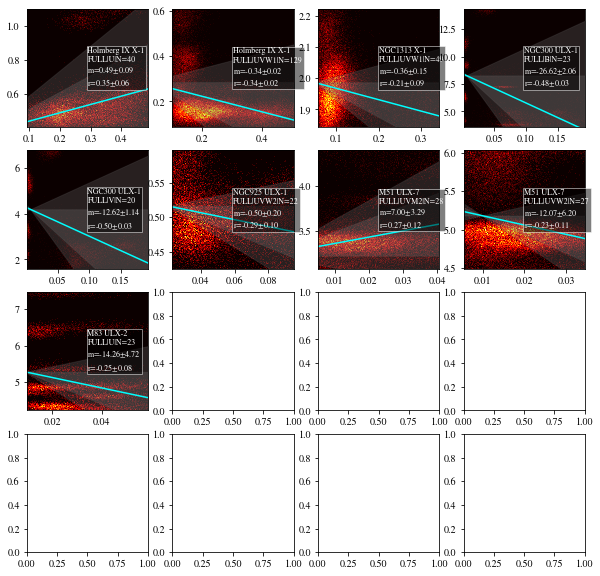

In [7]:
xrt_band = 'FULL'

fig, axes = plt.subplots(4,4,figsize=(10,10),facecolor='white')
ax = axes.flatten()

j = 0

for i, fn in enumerate(glob('../lightcurves/joined/*nosys*.fits')):
    tab = Table.read(fn)
    tables           = corr.calc_subsets(tab)
    tab_5_sig        = tables['tab_5_sig']
    tab_UL           = tables['tab_UL']
    tab_no_UL        = tables['tab_no_UL']
    tab_BAD          = tables['tab_BAD']
    tab_no_BAD       = tables['tab_no_BAD']
    tab_UL_no_bad    = tables['tab_UL_no_bad']
    tab_no_UL_no_bad = tables['tab_no_UL_no_bad']
    
    N = len(tab_no_UL_no_bad)
    
    if N<20:
        continue

    sp = fn.split('/')[-1][:-5].split(',')
    simbad_name = sp[0]
    uvot_band   = sp[1]
    lc_type     = sp[2]
    
    print(simbad_name, xrt_band, uvot_band)
    fit_vals = df_fit_val_idx.loc[simbad_name, xrt_band, uvot_band, 'False', 'False']

    if (fit_vals['r_mean'] > -0.2) and (fit_vals['r_mean'] < 0.2):
        continue
    if tab_no_UL_no_bad['Rate'].max() > 3:
        continue
    
    readable_name = source_names_readable[simbad_name]

    x = tab_no_UL_no_bad['Rate']
    y = tab_no_UL_no_bad['COI_SRC_RATE']
    x_err = 2*tab_no_UL_no_bad['Ratepos']
    y_err = tab_no_UL_no_bad['COI_SRC_RATE_ERR']

    x_samp = np.random.normal(loc=x, scale=x_err, size=(10000,len(x))).flatten()
    y_samp = np.random.normal(loc=y, scale=y_err, size=(10000,len(y))).flatten()


    ax[j].hist2d(x_samp, y_samp, bins=1000, cmap='hot')
    
    #ax[j].set_xlabel(f'{xrt_band}')
    #ax[j].set_ylabel(f'{uvot_band}')
    ax[j].text(0.5, 0.5,f'{readable_name}\n{xrt_band}|{uvot_band}|N={N}\nm={fit_vals["m_mean"]:.2f}$\pm${fit_vals["m_std"]:.2f}\nr={fit_vals["r_mean"]:.2f}$\pm${fit_vals["r_std"]:.2f}',color='white',
               horizontalalignment='left',verticalalignment='center',transform = ax[j].transAxes,
               size = 8, 
               bbox=dict(facecolor='black', edgecolor='white', pad=1, alpha=0.5))
    
    ax[j].set_xlim(min(x),max(x))
    ax[j].set_ylim(min(y),max(y))

    
    plot_bestfit(ax[j], fit_vals)

    
    print(i,j)
    j+=1
    if j == 16:
        break
#plt.subplots_adjust
plt.tight_layout()
plt.show()
    